<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_paper_fev_2021/blob/main/defesa/PSD_histogram_final_amostra_03_dez_01_2021_roda_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import sklearn
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from sklearn.metrics import r2_score
from google.colab import files

In [2]:
#!pip install mahotas

In [3]:
def BlackWhite(Transfere,Size):

  img_name=[]
  xw=[]
  ww=[]

  with zipfile.ZipFile(Transfere, "r") as f:
    for name in f.namelist():
      img_name.append(name)
      #xw.append(cv2.imread(name))
      xw.append(cv2.resize(cv2.imread(name),(Size,Size)))

  nrow=len(img_name)
  ncol=Size*Size
  pw=np.zeros((nrow,ncol))
  #pw=[]
  for i in range(nrow):
    ww.append(cv2.cvtColor(np.array(xw[i]), cv2.COLOR_BGR2GRAY))
    pw[i,:]=ww[i].ravel()
  return ww,img_name

In [4]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip' 
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/Doutorado


In [5]:
labels =[]
with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)
print(labels)

['Fotos_Grandes-3cdAmostra/Q6-8-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-5-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-8-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-3-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-8-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-3-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-1.jpg', 'Fotos_Grandes-3cdAmostra/Q6-5-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-1.jpg', 'Fotos_Grandes-3cdAmostr

In [6]:
Size=1200 # tamanho da foto
ww,img_name=BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [7]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

fatal: destination path 'MarquesGabi_Routines' already exists and is not an empty directory.
/content/Doutorado/MarquesGabi_Routines


In [8]:
FILE='SugarSample03.zip'
img_name=[]
x_original = [] 

data_file ='xls'


file_name = zipfile.ZipFile(FILE, 'r')
file_name.extractall()

k = 0
with zipfile.ZipFile(FILE, "r") as f:
    for name in f.namelist():
      if(name[-3:] == data_file):
        #df =pd.read_csv(name)
        if( k > 0):
          df_old = df_ImgJ.copy()
        df_ImgJ = pd.read_excel(name)
        df_ImgJ = df_ImgJ.drop(labels=[0], axis=0)
        if(k > 0):
          df_ImgJ = pd.concat( [df_ImgJ, df_old], ignore_index = True)
        k = k + 1

In [9]:
f.namelist()

['Results_03_02.xls', 'Results_03_03.xls', 'Results_03_01.xls']

In [10]:
df_ImgJ.shape

(174, 13)

In [11]:
df_ImgJ.head()

,,Area,Mean,Min,Max,Major,Minor,Angle,Feret,FeretX,FeretY,FeretAngle,MinFeret
0,2,1.288,255,255,255,1.383,1.185,5.847,1.636,767,213,18.157,1.161
1,3,0.407,255,255,255,0.814,0.637,62.186,0.877,283,234,59.036,0.667
2,4,0.592,255,255,255,0.925,0.815,117.923,1.078,633,154,122.335,0.802
3,5,1.391,255,255,255,1.435,1.235,29.966,1.564,1321,333,53.253,1.165
4,6,0.549,255,255,255,0.923,0.758,136.396,1.024,370,254,118.237,0.738


In [12]:
df_ImgJ.head()

,,Area,Mean,Min,Max,Major,Minor,Angle,Feret,FeretX,FeretY,FeretAngle,MinFeret
0,2,1.288,255,255,255,1.383,1.185,5.847,1.636,767,213,18.157,1.161
1,3,0.407,255,255,255,0.814,0.637,62.186,0.877,283,234,59.036,0.667
2,4,0.592,255,255,255,0.925,0.815,117.923,1.078,633,154,122.335,0.802
3,5,1.391,255,255,255,1.435,1.235,29.966,1.564,1321,333,53.253,1.165
4,6,0.549,255,255,255,0.923,0.758,136.396,1.024,370,254,118.237,0.738


In [13]:
from Segment_Filter import Segmenta  # got image provided segmented

In [14]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

fatal: destination path 'MarquesGabi_Routines' already exists and is not an empty directory.
/content/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines


In [15]:
# leitura dos dados
df=pd.read_excel("FotosTreinoRede.xlsx")
y = df['y']
df.drop(['Unnamed: 0','y'], axis='columns', inplace=True)

In [16]:
X =np.array(df.copy())/255.0 


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)

In [17]:
Img_Size = 28

In [18]:
# helper
def ynindicator(Y):
  N = len(Y)
  K = len(set(Y))
  I = np.zeros((N, K))
  I[np.arange(N), Y] = 1
  return I

def yback(Y_test):
  nrow, ncol = Y_test.shape
  y_class = np.zeros(nrow,dtype=int)
  y_resp = Y_test
  for k in range(nrow):
    for kk in range(K):
      if(y_resp[k,kk] == 1):
        y_class[k] = kk
  Y_test = y_class.copy()
  return Y_test

X_train = np.array(X_train)
Y_train = np.array(Y_train)
K = len(set(Y_train))

X_train = X_train.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_train = Y_train.astype(np.int32)
Y_train = ynindicator(Y_train)

X_test = np.array(X_test )
Y_test = np.array(Y_test)
X_test = X_test.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_test = Y_test.astype(np.int32)
Y_test = ynindicator(Y_test)

# the model will be a sequence of layers

Description = '3 layers of Convolution: 64, 128, 256 '
N1 = 20
N2 = 20

# make the CNN
model = Sequential()
model.add(Conv2D(input_shape=(Img_Size, Img_Size, 1), filters=64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=256, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=N1))
model.add(Dropout(0.2))
model.add(Dense(units=N2))
model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Dense(units=K))
model.add(Activation('softmax'))


# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [19]:
# training the model
r = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), 
              epochs=200, batch_size=32)

Epoch 1/200
11/11 [==============================] - 3s 154ms/step - loss: 0.6779 - accuracy: 0.7376 - val_loss: 0.6937 - val_accuracy: 0.4898
Epoch 2/200
11/11 [==============================] - 1s 131ms/step - loss: 0.2863 - accuracy: 0.8688 - val_loss: 0.6940 - val_accuracy: 0.4898
Epoch 3/200
11/11 [==============================] - 1s 129ms/step - loss: 0.2468 - accuracy: 0.8921 - val_loss: 0.6945 - val_accuracy: 0.4898
Epoch 4/200
11/11 [==============================] - 1s 132ms/step - loss: 0.1767 - accuracy: 0.9300 - val_loss: 0.6943 - val_accuracy: 0.4898
Epoch 5/200
11/11 [==============================] - 1s 130ms/step - loss: 0.1006 - accuracy: 0.9621 - val_loss: 0.6951 - val_accuracy: 0.4898
Epoch 6/200
11/11 [==============================] - 1s 130ms/step - loss: 0.0812 - accuracy: 0.9767 - val_loss: 0.6956 - val_accuracy: 0.4898
Epoch 7/200
11/11 [==============================] - 1s 131ms/step - loss: 0.0853 - accuracy: 0.9708 - val_loss: 0.6964 - val_accuracy: 0.4898

In [20]:
Y_test = yback(Y_test)

In [21]:
# pred_test= model.predict_classes(X_test)
pred_test = np.argmax(model.predict(X_test), axis=-1)

data = {'y_true': Y_test,'y_predict': pred_test}  # este dado esta no formato de dicionario

df = pd.DataFrame(data, columns=['y_true','y_predict'])


confusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])
print(confusion_matrix)

y_true = df['y_true']
y_pred = df['y_predict']

  
METRICS=sklearn.metrics.classification_report(y_true, y_pred)

Predict   0   1
Actual         
0        61  11
1         1  74


In [22]:
print(METRICS)

              precision    recall  f1-score   support

           0       0.98      0.85      0.91        72
           1       0.87      0.99      0.93        75

    accuracy                           0.92       147
   macro avg       0.93      0.92      0.92       147
weighted avg       0.93      0.92      0.92       147



In [23]:
pred_test

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1])

In [24]:
'''
img=ww[4] 
df=Segmenta(img)
df.shape
'''

'\nimg=ww[4] \ndf=Segmenta(img)\ndf.shape\n'

In [25]:
Sample3 =[4,13,25]
Repetir = 40
for i in range(Repetir):
  k = 0
  for i in Sample3:
    img=ww[i]
    if( k > 0):
      df_old = df_ann.copy()
    df_ann=Segmenta(img)
    if(k > 0):
      df_ann = pd.concat( [df_ann, df_old], ignore_index = True)
    k = k + 1
#df_ann = df.copy

df_teste = np.array(df_ann)
names = df_ann.columns
df_teste = pd.DataFrame(df_teste,columns=names)
Width = df_ann['Width']
#del df_ann['Width']
names = df_ann.columns
del df_ann['Width']
result = np.array(df_ann)
result = result.reshape(-1, Img_Size, Img_Size, 1) / 255.0
prediction= np.argmax(model.predict(result), axis=-1)

In [26]:
df_ann

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,121.772377,120.263229,126.998375,129.639694,128.776047,125.556763,166.786163,170.414490,160.661774,155.381912,145.801178,138.067810,136.573425,140.456284,137.187103,175.017944,247.908737,214.814682,205.995224,197.157455,192.134720,191.735794,222.647797,248.505875,253.650955,254.741241,253.166183,252.972778,126.272316,126.876030,127.082458,130.368149,127.619133,123.988785,170.518265,175.615082,172.884003,167.197586,155.268661,145.867325,...,81.876541,81.734383,81.748276,88.442635,91.924248,96.162361,102.524811,109.523682,112.672890,117.069817,107.792084,77.355011,51.088123,49.452980,51.060101,68.695251,91.312592,104.638184,106.334068,108.035355,107.325226,70.493759,72.195435,114.855721,103.912903,91.752815,90.946732,84.069321,78.838280,81.280655,77.417503,88.138626,97.162498,106.125237,113.150238,122.081680,131.623291,129.719482,111.759766,85.125748
1,160.925598,162.864700,155.152557,144.148819,116.998268,105.332657,106.390411,111.298187,113.029877,118.738579,125.603271,138.330078,152.706680,160.293579,155.719040,125.144493,120.419701,121.097084,113.359375,108.776779,114.559029,122.406197,125.785110,122.733688,121.001144,126.187012,118.366272,59.159725,158.872162,164.885956,144.455612,130.850327,112.380638,100.497849,104.952881,130.056015,148.332947,160.898315,166.421432,165.788849,...,15.425452,80.873306,115.643204,117.529449,129.988800,134.222061,122.316864,109.085022,109.583450,96.099960,35.984486,4.696352,143.335251,149.627686,138.639160,127.933640,86.131561,34.311977,12.059465,17.248779,20.943405,22.460211,17.715887,18.032461,14.773914,10.881930,7.803217,4.528871,2.480896,26.295891,100.567650,127.006607,121.476868,129.947998,119.595230,113.834816,106.561905,52.403908,5.123240,3.670209
2,111.234009,102.223351,81.505180,78.245514,68.774368,59.737041,110.725998,152.237976,129.520966,109.232628,100.675041,102.085503,123.735001,130.236206,132.867996,140.374176,179.671280,167.048904,15.752326,1.068038,0.252770,1.467324,1.056744,0.208419,1.427246,1.230060,0.129025,1.333323,112.929863,105.276924,85.877876,73.098839,69.393944,67.525261,129.003342,142.482224,121.310516,102.533501,95.982567,90.540009,...,0.779708,0.410793,1.637313,0.921034,0.316871,1.543390,1.094045,0.237783,1.449467,1.253869,0.171881,1.355545,3.287964,4.801166,5.054150,1.341870,0.355423,0.783065,1.647844,0.449345,0.674613,1.662373,0.543268,0.576417,1.666646,0.637191,0.482495,1.652972,0.744788,0.388572,1.615091,0.876591,0.294649,1.521168,1.056744,0.208419,1.427246,1.230060,0.129025,1.333323
3,185.854706,180.336609,173.403687,170.117676,168.312302,172.199875,172.381989,172.510193,185.245895,193.789612,189.884277,175.220261,164.322159,158.271545,165.817245,179.137421,186.159775,185.122299,174.978317,170.666016,171.407639,178.044708,179.440506,178.199875,171.165665,165.405670,162.086136,144.653534,173.456299,166.058517,163.142014,163.299149,167.718597,174.535858,169.023026,172.407623,184.238663,192.802765,200.000656,198.416183,...,174.406952,181.218292,186.793564,189.855377,190.887589,188.328079,183.386612,199.173569,228.963837,246.522690,248.830383,252.646301,228.240646,242.585159,239.195953,240.297852,250.585144,254.701523,253.990814,251.825134,252.990158,251.575302,245.441162,225.196594,211.117706,199.228149,177.443130,176.300476,178.067062,183.489807,186.530563,187.878372,186.435257,183.245239,185.010513,183.707443,192.493088,214.842880,220.456284,219.627884
4,163.837723,81.385048,91.029564,104.475304,110.811935,98.493759,111.968262,155.340607,149.764938,127.880791,116.887520,120.698280,126.191238,124.015083,121.397148,125.146805,126.492958,132.030746,142.580048,141.534210,149.370773,157.665939,153.214249,131.494370,107.577873,127.139465,132.229721,136.612976,144.114655,52.359055,94.468956,107.

In [27]:
df_teste.shape # por que esta saindo 100 ???????

(150, 785)

In [28]:
#df_ann

In [29]:
img_graos = []
Width_new = []
k = 0
for i in prediction:
  if( i == 0):
    img_graos.append(df_teste.iloc[k,:])
    Width_new.append(Width.iloc[k])

  k = k +1

img_graos = pd.DataFrame(img_graos, columns=names )


In [30]:
img_graos.shape

(95, 785)

In [31]:
prediction

array([1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1])

In [32]:
img_graos.shape

(95, 785)

In [33]:
Width=np.array(Width_new)

In [34]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021

from Get_PSDArea_New import PSDArea
from histogram_fev_2021 import PSD
#from GetBetterSegm import GetBetter

fatal: destination path 'marquesgabi_paper_fev_2021' already exists and is not an empty directory.
/content/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021


In [35]:

!git clone https://github.com/ucfilho/marquesgabi_out_2020
#!git clone https://github.com/marquesgabi/Doutorado
%cd marquesgabi_out_2020
#%cd Doutorado
#PSD_imageJ = 'Amostra7.csv' 
#PSD_new = pd.read_csv(PSD_imageJ,sep=';')
#encoding='utf8'

PSD_imageJ = 'Areas_ImageJ.csv'
PSD_new = pd.read_csv(PSD_imageJ)
print(PSD_new.head(3))
''''''

fatal: destination path 'marquesgabi_out_2020' already exists and is not an empty directory.
/content/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/marquesgabi_out_2020
   Juntas   Area
0       1  2.001
1       2  0.820
2       3  1.270


''

In [36]:
Area_All, Diameter_All=PSDArea(img_graos) 

In [37]:
Width.shape

(95,)

In [38]:
Width

array([118, 156, 126, 147, 159, 168, 190, 162, 181, 156, 172, 177, 144,
       197, 156, 182, 131, 172, 105, 183, 129, 135, 121, 121, 117, 143,
       156, 159, 150, 135, 100, 195, 198, 130, 184, 124, 125, 166, 130,
       140, 133, 182, 149, 148, 153, 116, 136, 124, 152, 195, 187, 190,
       156, 184, 173, 153, 152, 149, 105, 153, 112, 127, 110, 131, 124,
       118, 186, 192, 131, 104, 114, 197, 148, 188, 110, 182, 151, 180,
       126, 120, 172, 105, 174, 177, 183, 149, 176, 122, 196, 100, 141,
       102, 159, 119, 191])

In [39]:
img_graos.shape

(95, 785)

In [40]:
img_graos.head()

,Width,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
1,118.0,160.925598,162.864700,155.152557,144.148819,116.998268,105.332657,106.390411,111.298187,113.029877,118.738579,125.603271,138.330078,152.706680,160.293579,155.719040,125.144493,120.419701,121.097084,113.359375,108.776779,114.559029,122.406197,125.785110,122.733688,121.001144,126.187012,118.366272,59.159725,158.872162,164.885956,144.455612,130.850327,112.380638,100.497849,104.952881,130.056015,148.332947,160.898315,166.421432,...,15.425452,80.873306,115.643204,117.529449,129.988800,134.222061,122.316864,109.085022,109.583450,96.099960,35.984486,4.696352,143.335251,149.627686,138.639160,127.933640,86.131561,34.311977,12.059465,17.248779,20.943405,22.460211,17.715887,18.032461,14.773914,10.881930,7.803217,4.528871,2.480896,26.295891,100.567650,127.006607,121.476868,129.947998,119.595230,113.834816,106.561905,52.403908,5.123240,3.670209
3,156.0,185.854706,180.336609,173.403687,170.117676,168.312302,172.199875,172.381989,172.510193,185.245895,193.789612,189.884277,175.220261,164.322159,158.271545,165.817245,179.137421,186.159775,185.122299,174.978317,170.666016,171.407639,178.044708,179.440506,178.199875,171.165665,165.405670,162.086136,144.653534,173.456299,166.058517,163.142014,163.299149,167.718597,174.535858,169.023026,172.407623,184.238663,192.802765,200.000656,...,174.406952,181.218292,186.793564,189.855377,190.887589,188.328079,183.386612,199.173569,228.963837,246.522690,248.830383,252.646301,228.240646,242.585159,239.195953,240.297852,250.585144,254.701523,253.990814,251.825134,252.990158,251.575302,245.441162,225.196594,211.117706,199.228149,177.443130,176.300476,178.067062,183.489807,186.530563,187.878372,186.435257,183.245239,185.010513,183.707443,192.493088,214.842880,220.456284,219.627884
6,126.0,126.654327,123.617279,122.629631,126.456795,129.345688,133.641983,142.913589,151.851852,153.666672,152.703705,153.469147,154.777786,155.283966,146.148148,108.209877,79.839508,86.172844,86.246918,91.037033,98.444450,103.246918,87.543213,81.419754,91.641975,106.506172,112.802475,111.308655,101.679016,123.814812,122.950615,122.259262,122.283951,130.160492,137.864197,148.049377,152.395065,149.024689,145.740738,145.000015,...,164.123459,147.506165,117.790115,89.098770,114.345680,143.777771,151.938293,153.222229,159.506180,197.481491,210.444458,215.037048,189.716049,194.407425,200.197525,223.160492,240.320984,239.777802,225.827179,207.604919,194.259277,183.543213,184.925934,168.308640,160.370377,150.740753,142.197540,146.888901,154.617279,142.543213,119.716057,113.691360,142.123474,152.197540,151.691360,142.358032,144.320984,197.851852,215.407410,219.012360
7,147.0,173.068039,172.433105,175.791397,182.870758,183.483002,183.124725,183.460327,157.424042,105.492081,140.947861,150.161011,157.204086,161.947861,166.392288,175.589584,177.875290,177.541946,174.730148,155.512482,146.809525,140.095245,135.750580,141.412720,146.922913,151.589584,155.888901,158.281174,160.199554,170.977325,165.027222,172.435379,178.054413,177.628128,182.086166,181.106583,162.281204,78.870758,75.696144,141.789124,...,173.743774,184.723358,188.927444,195.961441,203.267578,218.582764,220.653061,215.854889,213.102051,236.058960,221.281189,208.659866,191.809540,186.000015,185.471664,206.360535,208.469406,199.734711,205.886627,216.285721,237.818604,250.666687,253.596405,253.238098,252.716568,253.351471,253.274368,246.897949,181.961456,185.104309,202.365097,207.557831,215.399109,223.911575,223.342407,214.154205,200.548767,197.709778,201.807266,201.049896
8,159.0,197.428284,214.094574,216.787460,201.797623,152.053513,182.339188,193.881683,197.263199,202.399536,201.982391,198.928207,201.625565,205.945160,207.121552,196.577942,182.076385,166.940582,165.417694,173.199203,179.723770,179.022491

In [41]:
PSD_new.head()

,Juntas,Area
0,1,2.001
1,2,0.820
2,3,1.270
3,4,0.958
4,5,1.162


In [42]:
# 
Area = df_ImgJ['Area'].values
# Area = np.concatenate( (Area, [lost_value] ) )

Diam1 = [ (4*A/np.pi)**0.5 for A in Area]



In [43]:
len(Diameter_All)

95

In [44]:
#

PSD_new['Area'].shape

(95,)

In [45]:
#PSD_new.shape

In [46]:
#lost_value = float(PSD_new.columns[1])
#Area2 = np.array(PSD_new.iloc[:,1])
#Area2 = np.concatenate( (Area2, [lost_value] ) )
Area2 = PSD_new['Area'].values
for A in Area2:
  Diam1.append((4*A/np.pi)**0.5) 


In [47]:
wt1 = np.ones(len(Diam1)) / len(Diam1)*100
wt2 = np.ones(len(Diameter_All)) / len(Diameter_All)*100
X = pd.DataFrame([Diam1,Diameter_All])
wts = pd.DataFrame([wt1,wt2])


In [48]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268
0,1.280599,0.719867,0.868192,1.330818,0.836067,0.923618,0.955465,0.904113,0.697408,0.911127,1.045198,0.970012,0.579772,0.628255,0.600272,0.659885,0.934581,0.731273,0.777682,1.113042,0.753568,0.874039,0.918781,0.970012,0.623168,1.355934,0.932536,0.906925,0.858607,0.660849,0.952796,1.028621,0.891348,0.856380,0.575363,1.260557,1.048239,0.606602,0.860088,0.769452,...,1.550444,0.782578,1.469061,1.053087,1.267607,0.7744,1.378748,1.363893,1.299352,1.287045,1.118178,0.947435,1.521848,1.352644,1.155694,1.601345,1.274619,1.422384,1.340826,1.172646,1.149065,1.45906,1.248377,1.336546,0.960117,1.486723,1.427745,1.350288,0.756098,1.259041,1.134568,1.654913,1.120453,1.117608,0.91531,1.163927,1.306681,1.152936,1.30473,1.306681
1,1.042714,1.352475,1.025230,1.110356,1.397988,1.378982,1.523077,1.371356,1.498515,1.291538,1.523674,1.471630,1.223941,1.624015,1.320565,1.465564,1.089172,1.413853,0.938193,1.615073,1.068002,1.024922,0.991759,1.055808,1.020905,1.187268,1.336615,1.344130,1.390022,1.152075,0.807669,1.390164,1.620524,1.110888,1.683694,0.958743,0.963321,1.474167,0.986962,1.243274,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
Diameter_All

[1.0427143268443408,
 1.352475472613083,
 1.0252296338232254,
 1.1103561236965709,
 1.3979882617319663,
 1.378981621998293,
 1.5230765025435784,
 1.3713555580196974,
 1.4985148592456874,
 1.2915376687421394,
 1.5236742116475956,
 1.4716298558344385,
 1.2239413124797172,
 1.6240151890834016,
 1.3205646114263752,
 1.4655635390657777,
 1.0891723791769008,
 1.4138532401474937,
 0.9381934024458948,
 1.6150732814173876,
 1.0680023029983077,
 1.0249218956701653,
 0.9917588052324864,
 1.0558078730480867,
 1.0209051334431913,
 1.1872681450230118,
 1.3366152769162254,
 1.3441300905596503,
 1.3900220864657844,
 1.1520749050286179,
 0.8076692540105918,
 1.3901639182182548,
 1.6205243409390044,
 1.1108876363913034,
 1.683694130651539,
 0.9587425893127227,
 0.9633211153483641,
 1.4741672095530145,
 0.9869618254601593,
 1.2432735502254337,
 1.1485824473488697,
 1.5132013206885186,
 1.3215636907042667,
 1.1935650573051453,
 1.2467511212408213,
 0.969876330532604,
 1.2047656557213546,
 0.99099110005692

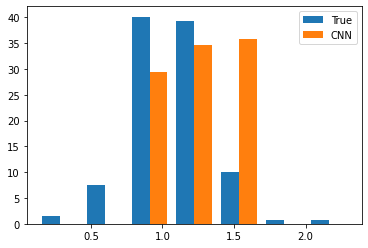

In [50]:
A = plt.hist(X,weights=wts,bins=7)
plt.legend(['True','CNN'])

In [51]:
print('ImgJ:','media=',np.mean(np.array(Diam1)),'desvio=',np.std(np.array(Diam1)),'pontos=',len(Diam1))

ImgJ: media= 1.0865462723070898 desvio= 0.279391220003608 pontos= 269


In [52]:
print('Software:','media=',np.mean(np.array(Diameter_All)),'desvio=',np.std(np.array(Diameter_All)),'pontos=',len(Diameter_All))

Software: media= 1.2605654090235872 desvio= 0.23993960025290006 pontos= 95


In [53]:
np.mean(np.array(Diameter_All))

1.2605654090235872

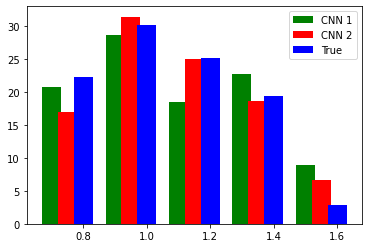

In [54]:
# Freq1 = [19.12043703, 29.22484843, 19.35872174, 20.82190224, 11.47409056] # avarage 4 samples
Freq1 = [20.69301557, 28.55598044, 18.50768331, 22.7106327, 8.905907357] # avarage 10 samples
#Freq2 = [16.93792791, 31.38008965, 24.93810752, 18.56158392, 6.233810752, 0.4]
Freq2 = [16.93792791, 31.38008965, 24.93810752, 18.56158392, 6.633810752]
Freq3 = [22.22489, 30.15078, 25.10463, 19.30926, 2.810434]
barWidth = 0.25

br1 = range(len(Freq1))
# Set position of bar on X axis
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
# labels = [0.8, 1.0, 1.2, 1.4, 1.6, 1.8]
labels = [0.8, 1.0, 1.2, 1.4, 1.6]

xx=[]
for a in labels:
  xx.append(str(a))
plt.bar(br1, Freq1 , color="green", align="center", width=0.3, tick_label= xx) 
plt.bar(br2, Freq2 , color="red", align="center", width=0.3, tick_label= xx)
plt.bar(br3, Freq3 , color="blue", align="center", width=0.3, tick_label= xx)
plt.legend(['CNN 1','CNN 2','True'])